In [200]:
import pandas as pd

# df = pd.read_csv('./data/test_df.csv', encoding='cp949')
df = pd.read_csv('./data/whole_df.csv')
df.drop(columns="Unnamed: 0", inplace=True)
# df["날짜"] = pd.to_datetime(df["날짜"], format='%Y%m')      # 데이터 타입 datetime으로 변경
# df["날짜"] = df["날짜"].dt.strftime('%Y%m') # datetime 형식 설정
# df.set_index("날짜", inplace=True)          # 날짜 컬럼 인덱스 설정

df.head()

,날짜,서적/문구,소비자물가지수,소매판매지수,동월_평균_등락률,전체_평균_대비,소비,월,전년_동월_대비
0,201212,0.118333,0.001782,0.023590,0.164177,1,1,12,1.0
1,201301,-0.069215,0.005999,-0.086172,-0.077975,0,0,1,0.0
2,201302,-0.107126,0.003343,-0.048246,-0.093226,0,0,2,0.0
3,201303,0.471158,-0.000924,0.078341,0.390163,1,1,3,1.0
4,201304,-0.204835,-0.001388,-0.018162,-0.222949,0,1,4,0.0


In [28]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import train_test_split

# import matplotlib.pyplot as plt
# %matplotlib inline
# import numpy as np

# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso

In [221]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

In [32]:
# params = {'C':[0, 0.1, 1, 10, 20]}

In [33]:
# lr = LogisticRegression()
# rg = Ridge()
# ls = Lasso()
# logisticreg = LogisticRegression()
# detreec = DecisionTreeClassifier()
# randomforest = RandomForestClassifier()
# xgb = XGBClassifier()

In [34]:
# splitter = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
# scores_logistic = cross_validate(lr, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_ridge = cross_validate(rg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_lasso = cross_validate(ls, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_logisticreg = cross_validate(logisticreg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_dectree = cross_validate(detreec, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_randomforest = cross_validate(randomforest, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_xgb = cross_validate(xgb, data, target, cv=splitter, n_jobs=-1, return_train_score=True)

In [35]:
# print('로지스틱 train data score : ',np.mean(scores_logistic['train_score'])) 
# print('로지스틱 test data score : ',np.mean(scores_logistic['test_score']))  
# print('릿지 train data score : ',np.mean(scores_ridge['train_score'])) 
# print('릿지 test data score : ',np.mean(scores_ridge['test_score']))  
# print('라쏘 train data score : ', np.mean(scores_lasso['train_score'])) 
# print('라쏘 test data score : ', np.mean(scores_lasso['test_score'])) 
# print('결정트리(Decision Tree) train data score : ',np.mean(scores_dectree['train_score']))
# print('결정트리(Decision Tree) test data score : ',np.mean(scores_dectree['test_score']))
# print('랜덤포레스트 train data score : ',np.mean(scores_randomforest['train_score']))
# print('랜덤포레스트 test data score : ',np.mean(scores_randomforest['test_score']))
# print('XGB train data score : ',np.mean(scores_xgb['train_score']))
# print('XGB test data score : ',np.mean(scores_xgb['test_score']))

로지스틱 train data score :  0.6941314553990611
로지스틱 test data score :  0.6944444444444445
릿지 train data score :  0.5011621032217423
릿지 test data score :  0.4624484634351287
라쏘 train data score :  0.0023680243561094625
라쏘 test data score :  -0.02511630804150448
결정트리(Decision Tree) train data score :  1.0
결정트리(Decision Tree) test data score :  0.9285714285714285
랜덤포레스트 train data score :  1.0
랜덤포레스트 test data score :  0.9055555555555554


In [95]:
data = df[["날짜", "서적/문구", "소비자물가지수", "소매판매지수", "전년_동월_대비"]]
target = df["소비"]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         111 non-null    int64  
 1   서적/문구      111 non-null    float64
 2   소비자물가지수    111 non-null    float64
 3   소매판매지수     111 non-null    float64
 4   동월_평균_등락률  111 non-null    float64
 5   전체_평균_대비   111 non-null    int64  
 6   소비         111 non-null    int64  
 7   월          111 non-null    int64  
 8   전년_동월_대비   111 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 7.9 KB


In [97]:
# 데이터 셋 분리

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state=11)


In [98]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(77, 5), 테스트 세트 Shape:(34, 5)
 학습 세트 레이블 값 분포 비율
1    0.662338
0    0.337662
Name: 소비, dtype: float64

 테스트 세트 레이블 값 분포 비율
1    0.324675
0    0.116883
Name: 소비, dtype: float64


### DecisionTree

In [99]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=11)

In [100]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [101]:
X_pred = dt_clf.predict(X_test)
X_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [103]:
print('X_train의 Shape:', X_train.shape)
print('y_train의 Shape:', y_train.shape)
print('X_test의 Shape:', X_test.shape)
print('y_train의 Shape:', y_test.shape)
print('X_pred의 Shape:', X_pred.shape)

X_train의 Shape: (77, 5)
y_train의 Shape: (77,)
X_test의 Shape: (34, 5)
y_train의 Shape: (34,)
X_pred의 Shape: (34,)


In [104]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 1.0000


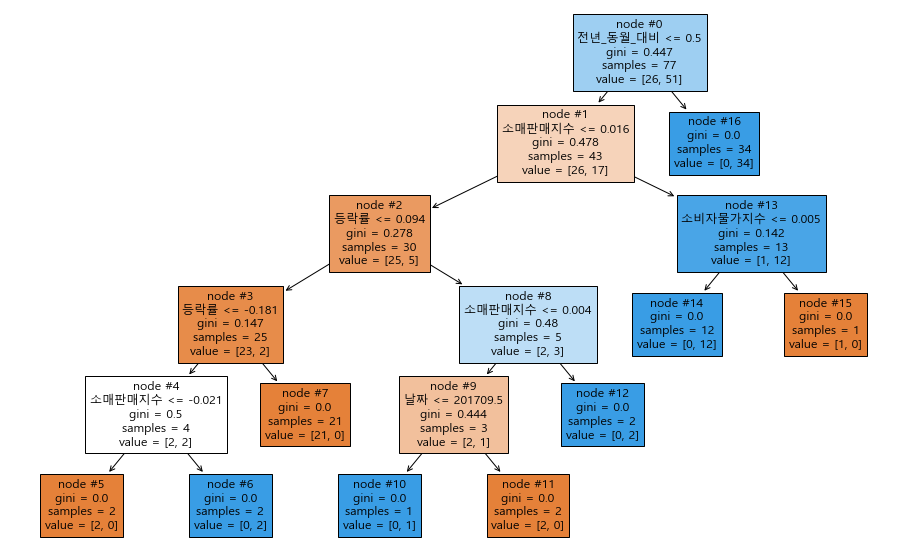

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = ["날짜", "등락률", "소비자물가지수", "소매판매지수",  "전년_동월_대비"]

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))
plot_tree(dt_clf, filled=True, feature_names=feature_names, node_ids=True)
plt.show()

In [11]:
dt_clf.feature_importances_

array([0.03871292, 0.11420312, 0.05360251, 0.39038068, 0.40310078])

<AxesSubplot:title={'center':'피처중요도'}>

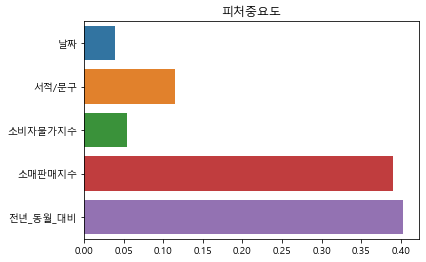

In [12]:
# 피처 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.title("피처중요도")
sns.barplot(x=dt_clf.feature_importances_, y=data.columns)

### 데이터 수동 분리

In [105]:
num_of_train = int(len(data) * 0.7)
num_of_test = int(len(data) - num_of_train)

print('훈련 데이터 크기:', num_of_train)
print('테스트 데이터 크기:', num_of_test)

훈련 데이터 크기: 77
테스트 데이터 크기: 34


In [106]:
X_train = data[:num_of_train] 
X_test = data[num_of_train:] 
y_train = target[:num_of_train] 
y_test = target[num_of_train:] 

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
         날짜     서적/문구   소비자물가지수    소매판매지수  전년_동월_대비
77   201905  0.005815  0.001719  0.046679       0.0
78   201906 -0.044019 -0.001616 -0.056604       1.0
79   201907  0.077752 -0.003056  0.004545       0.0
80   201908 -0.016262  0.002400  0.009050       1.0
81   201909 -0.024028  0.003711  0.016143       0.0
82   201910 -0.033313  0.002475  0.021183       1.0
83   201911  0.021241 -0.005598  0.040622       1.0
84   201912  0.121899  0.002392  0.009967       0.0
85   202001 -0.061820  0.003720 -0.080592       0.0
86   202002 -0.108362  0.000699 -0.125224       0.0
87   202003 -0.049071 -0.002196  0.093047       0.0
88   202004  0.034980 -0.004403  0.018709       1.0
89   202005  0.107948 -0.000603  0.087236       1.0
90   202006 -0.084113  0.002715 -0.012669       0.0
91   202007  0.011341 -0.000802 -0.051326       0.0
92   202008 -0.029148  0.005621  0.007214       0.0
93   202009 -0.006505  0.005490  0.056401       1.0
94   202010 -0.051901 -0.005559 -0.018644       0.0


### 코로나 전, 후 데이터 분리

In [201]:
X_train = data[:84] 
X_test = data[85:] 
y_train = target[:84] 
y_test = target[85:] 

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
         날짜     서적/문구   소비자물가지수    소매판매지수  전년_동월_대비
85   202001 -0.061820  0.003720 -0.080592       0.0
86   202002 -0.108362  0.000699 -0.125224       0.0
87   202003 -0.049071 -0.002196  0.093047       0.0
88   202004  0.034980 -0.004403  0.018709       1.0
89   202005  0.107948 -0.000603  0.087236       1.0
90   202006 -0.084113  0.002715 -0.012669       0.0
91   202007  0.011341 -0.000802 -0.051326       0.0
92   202008 -0.029148  0.005621  0.007214       0.0
93   202009 -0.006505  0.005490  0.056401       1.0
94   202010 -0.051901 -0.005559 -0.018644       0.0
95   202011 -0.005193 -0.000898  0.027634       0.0
96   202012  0.120831  0.002398  0.000840       0.0
97   202101 -0.010869  0.007077 -0.057935       1.0
98   202102 -0.091223  0.005344 -0.053476       1.0
99   202103  0.341261  0.002560  0.125235       1.0
100  202104 -0.195506  0.001375 -0.005021       0.0
101  202105  0.045043  0.000686  0.032801       0.0
102  202106 -0.077637  0.000000 -0.026873       1.0


### 코로나 전 후 DecisionTree, RandomForest, LogisticRegression 정확도

In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

data = df[["날짜", "서적/문구", "소비자물가지수", "소매판매지수", "전년_동월_대비"]]
target = df["소비"]

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11, n_jobs=-1)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, dt_pred)))


# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('\nRandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('\nLogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.9231
DecisionTreeClassifier roc_auc: 0.921

RandomForestClassifier 정확도: 0.9615
DecisionTreeClassifier roc_auc: 0.967

LogisticRegression 정확도: 0.5769
DecisionTreeClassifier roc_auc: 0.500


#### 최적화 작업 전이기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없음.

### KFold
#### 검증 데이터 분리

In [207]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state=11)
def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증
    for iter_count, (train_index, test_index) in enumerate(kfold.split(data)):
        X_train, X_test = data.values[train_index], data.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds=5)


교차 검증 0 정확도: 0.9130
교차 검증 1 정확도: 0.9545
교차 검증 2 정확도: 0.9545
교차 검증 3 정확도: 0.7727
교차 검증 4 정확도: 0.6364
평균 정확도: 0.8462


### StratifiedKFold cross_val_score()

In [204]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, data, target, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.9130
교차 검증 1 정확도: 0.9545
교차 검증 2 정확도: 0.8636
교차 검증 3 정확도: 0.9091
교차 검증 4 정확도: 0.9091
평균 정확도: 0.9099


### GridSearchCV
#### 최적 하이퍼 파라미터 찾기

In [226]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],\
            'min_samples_split':[2, 3, 5],\
            'min_samples_leaf':[1, 5, 8]}

# DecisionTreeClassifier GridSearchCV
def best_dtparam(clf, param, scoring_name, cv_num):
    grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
    
best_dtparam(dt_clf, parameters, 'accuracy', 5)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.8919
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.9615


In [232]:
parameters = {\
        'n_estimators':[100],\
        'max_depth' : [6, 8, 10, 12],\
        'min_samples_leaf' : [8, 12, 18],\
        'min_samples_split' : [8, 16, 20]
}

# RandomForestClassifier GridSearchCV
def best_rfparam(clf, param, cv_num, n_jobs_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num, n_jobs=n_jobs_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))

best_rfparam(rf_clf, parameters, 2, -1)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도 :0.8452
테스트 세트에서의 RandomForestClassifier 정확도 : 0.8846


In [233]:
# 최적 하이퍼 파라미터 적용
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=11)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.8846


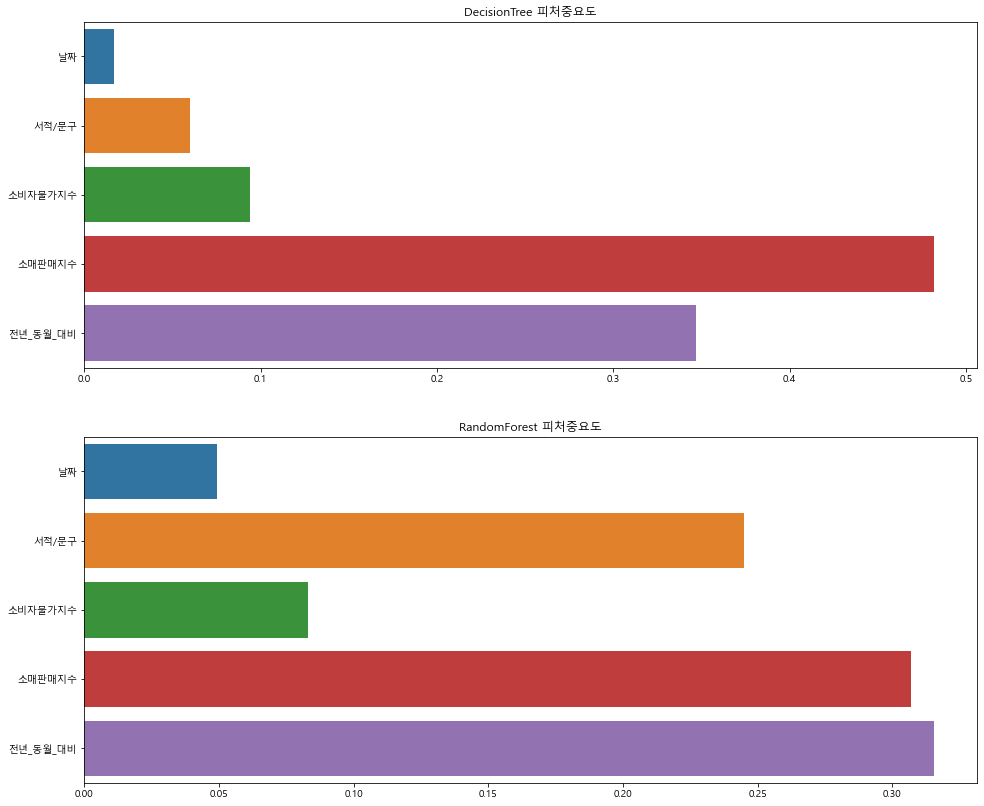

In [247]:
fig, axes = plt.subplots(2, 1, squeeze=False)
fig.set_size_inches((16,14))

plt.title("피처중요도")
sns.barplot(x=dt_clf.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")
sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

plt.show()

## 평가

### 오차행렬
#### TN : 환자를 암이 아니라 예측했고 실제로도 암이 아님
#### FP : 환자를 암이 맞다고 예측했고 실제로는 암이 아님 -> 1종 오류
#### FN : 환자를 암이 아니라 예측했고 실제로는 암이 맞음 -> 2종 오류
#### TP : 환자를 암이 맞다고 예측했고 실제로도 암
이 맞음

In [208]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, dt_pred)
print("오차행렬:\n", c_matrix)

오차행렬:
 [[10  1]
 [ 1 14]]


### 정밀도와 재현율
#### 정밀도 = TP / (FP + TP)
#### 재현율 = TP / (FN + TP)
#### 소비가 많은 월을 0이라 판단하게 되면 큰 영향이 발생하기 때문에 재현율이 더 중요하다.
#### 소비가 많이 없는 월을 1이라 판단하더라도 혜택이 있다면 소비가 늘어날 수도있기 때문에 정밀도<재현율

In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, dt_pred)
    accuracy = accuracy_score(y_test, dt_pred)
    precision = precision_score(y_test, dt_pred)
    recall = recall_score(y_test, dt_pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
    
get_clf_eval(y_test, dt_pred)

오차 행렬
[[10  1]
 [ 1 14]]
정확도: 0.9231, 정밀도: 0.9333, 재현율: 0.9333


### 정밀도/재현율 트레이드오프
#### 정밀도와 재현율 값이 똑같이 나왔기 때문에 더 중요한 재현율 값을 올려준다.

In [219]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: \n', pred_proba_result[:3])

pred_proba()결과 Shape : (26, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.28535193 0.71464807]
 [0.285351   0.714649  ]
 [0.28535008 0.71464992]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: 
 [[0.28535193 0.71464807 1.        ]
 [0.285351   0.714649   1.        ]
 [0.28535008 0.71464992 1.        ]]


In [220]:
from sklearn.preprocessing import Binarizer
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[10  1]
 [ 1 14]]
정확도: 0.9231, 정밀도: 0.9333, 재현율: 0.9333
임곗값: 0.45
오차 행렬
[[10  1]
 [ 1 14]]
정확도: 0.9231, 정밀도: 0.9333, 재현율: 0.9333
임곗값: 0.5
오차 행렬
[[10  1]
 [ 1 14]]
정확도: 0.9231, 정밀도: 0.9333, 재현율: 0.9333
임곗값: 0.55
오차 행렬
[[10  1]
 [ 1 14]]
정확도: 0.9231, 정밀도: 0.9333, 재현율: 0.9333
임곗값: 0.6
오차 행렬
[[10  1]
 [ 1 14]]
정확도: 0.9231, 정밀도: 0.9333, 재현율: 0.9333


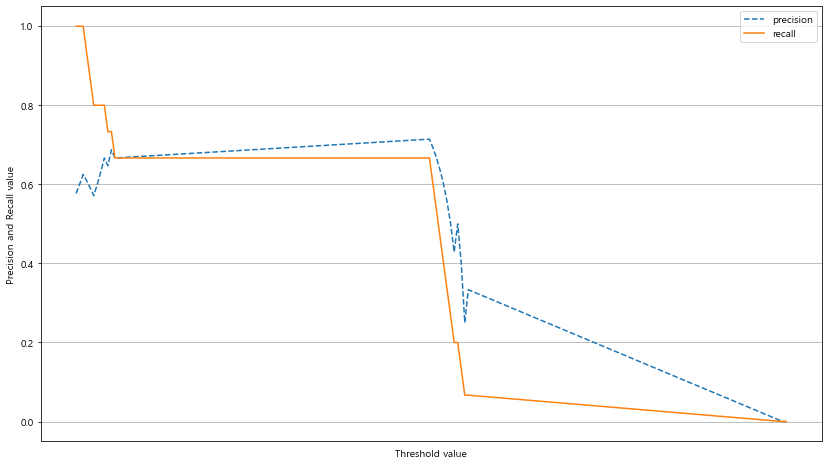

In [211]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))    
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

### F1 스코어
#### 정밀도와 재현율 결합 지표

In [212]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, dt_pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.9333


In [213]:
def get_clf_eval(y_test, dt_pred):
    confusion = confusion_matrix(y_test, dt_pred)
    accuracy = accuracy_score(y_test, dt_pred)
    precision = precision_score(y_test, dt_pred)
    recall = recall_score(y_test, dt_pred)
    f1 = f1_score(y_test, dt_pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차행렬
[[ 0 11]
 [ 0 15]]
정확도: 0.5769, 정밀도: 0.5769, 재현율: 1.0000, F1:0.7317
임곗값: 0.45
오차행렬
[[ 0 11]
 [ 0 15]]
정확도: 0.5769, 정밀도: 0.5769, 재현율: 1.0000, F1:0.7317
임곗값: 0.5
오차행렬
[[ 0 11]
 [ 0 15]]
정확도: 0.5769, 정밀도: 0.5769, 재현율: 1.0000, F1:0.7317
임곗값: 0.55
오차행렬
[[ 0 11]
 [ 0 15]]
정확도: 0.5769, 정밀도: 0.5769, 재현율: 1.0000, F1:0.7317
임곗값: 0.6
오차행렬
[[ 0 11]
 [ 0 15]]
정확도: 0.5769, 정밀도: 0.5769, 재현율: 1.0000, F1:0.7317


### ROC 곡선과 AUC
#### 민감도(TPR): 실제값 positive가 정확히 예측돼야 하는 수준
#### 특이성(TNR): 실제값 negative가 정확히 예측돼야 하는 수준

In [214]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = dt_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1]
샘플 index로 추출한 임곗값:  [1.]
샘플 임곗값별 FPR:  [0.364]
샘플 임곗값별 TPR:  [0.733]


c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


#### ROC 곡선 시각화

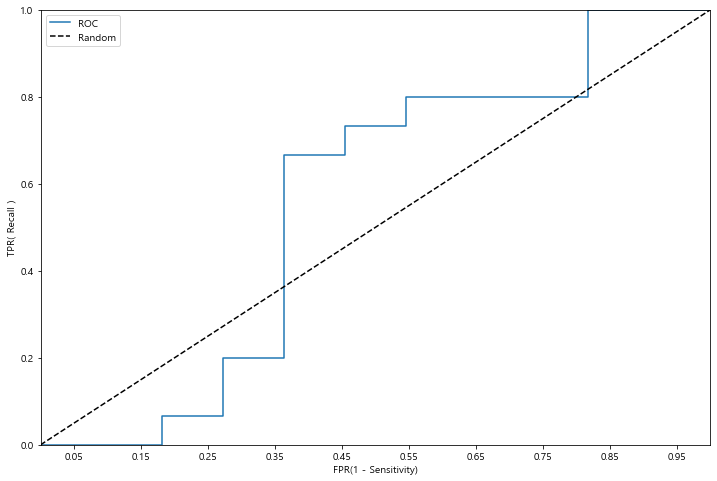

In [215]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선
    plt.plot(fprs, tprs, label="ROC")
    # 가운데 대각선 점선
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR( Recall )')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

In [216]:
from sklearn.metrics import roc_auc_score

pred_proba = dt_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.6848


c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### 교차 검증

In [124]:
cv_accuracy = []
n_iter = 0

for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))
    


#1 교차 검증 정확도 :0.913, 학습 데이터 크기: 88, 검증데이터 크기: 23
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
학습 레이블 데이터 분포:
 1    60
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     7
Name: 소비, dtype: int64

#2 교차 검증 정확도 :0.9545, 학습 데이터 크기: 89, 검증데이터 크기: 22
#2 검증 세트 인덱스:[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
학습 레이블 데이터 분포:
 1    60
0    29
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     6
Name: 소비, dtype: int64

#3 교차 검증 정확도 :0.9545, 학습 데이터 크기: 89, 검증데이터 크기: 22
#3 검증 세트 인덱스:[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
학습 레이블 데이터 분포:
 1    60
0    29
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     6
Name: 소비, dtype: int64

#4 교차 검증 정확도 :0.7727, 학습 데이터 크기: 89, 검증데이터 크기: 22
#4 검증 세트 인덱스:[67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
학습 레이블 데이터 분포:
 1    61
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0     7
Name: 소비, dtype: int64

#5 교차 검증 정확도 :0.6364, 학습 데이터 

In [76]:
X_pred = dt_clf.predict(X_test)
X_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0], dtype=int64)

In [77]:
y_test

85     0
86     0
87     1
88     1
89     1
90     0
91     0
92     0
93     1
94     0
95     1
96     0
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    0
105    1
106    1
107    0
108    1
109    0
110    0
Name: 소비, dtype: int64

In [138]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [22, 34]

### XGBClassifier

In [126]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=100, random_state=11)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.98718	validation_1-auc:0.77350
[1]	validation_0-auc:0.99756	validation_1-auc:0.91880
[2]	validation_0-auc:0.99817	validation_1-auc:0.96154
[3]	validation_0-auc:0.99817	validation_1-auc:0.96154
[4]	validation_0-auc:0.99817	validation_1-auc:0.95299
[5]	validation_0-auc:0.99817	validation_1-auc:0.95299
[6]	validation_0-auc:0.99817	validation_1-auc:0.95299


c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99817	validation_1-auc:0.95299
[8]	validation_0-auc:0.99878	validation_1-auc:0.94872
[9]	validation_0-auc:0.99878	validation_1-auc:0.95726
[10]	validation_0-auc:0.99878	validation_1-auc:0.95726
[11]	validation_0-auc:1.00000	validation_1-auc:0.95726
[12]	validation_0-auc:1.00000	validation_1-auc:0.96581
[13]	validation_0-auc:1.00000	validation_1-auc:0.96581
[14]	validation_0-auc:1.00000	validation_1-auc:0.96581
[15]	validation_0-auc:1.00000	validation_1-auc:0.96581
[16]	validation_0-auc:1.00000	validation_1-auc:0.96581
[17]	validation_0-auc:1.00000	validation_1-auc:0.96581
[18]	validation_0-auc:1.00000	validation_1-auc:0.96581
[19]	validation_0-auc:1.00000	validation_1-auc:0.96581
[20]	validation_0-auc:1.00000	validation_1-auc:0.96581
[21]	validation_0-auc:1.00000	validation_1-auc:0.96581
[22]	validation_0-auc:1.00000	validation_1-auc:0.96581
[23]	validation_0-auc:1.00000	validation_1-auc:0.96581
[24]	validation_0-auc:1.00000	validation_1-auc:0.96581
[25]	validati

### GridSearchCV

In [127]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", 
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.84402	validation_1-auc:0.85897
[1]	validation_0-auc:0.84890	validation_1-auc:0.87607
[2]	validation_0-auc:0.87973	validation_1-auc:0.87607
[3]	validation_0-auc:0.96001	validation_1-auc:0.92308
[4]	validation_0-auc:0.95696	validation_1-auc:0.92308
[5]	validation_0-auc:0.95452	validation_1-auc:0.91453
[6]	validation_0-auc:0.95208	validation_1-auc:0.91453
[7]	validation_0-auc:0.97466	validation_1-auc:0.95299
[8]	validation_0-auc:0.97619	validation_1-auc:0.94017
[9]	validation_0-auc:0.98291	validation_1-auc:0.96581
[10]	validation_0-auc:0.98718	validation_1-auc:0.97436
[11]	validation_0-auc:0.98962	validation_1-auc:0.97436
[12]	validation_0-auc:0.99206	validation_1-auc:0.97436
[13]	validation_0-auc:0.99267	validation_1-auc:0.97436
[14]	validation_0-auc:0.99145	validation_1-auc:0.97436
[15]	validation_0-auc:0.99206	validation_1-auc:0.97436
[16]	validation_0-auc:0.99206	validation_1-auc:0.97436
[17]	validation_0-auc:0.99206	validation_1-auc:0.97436
[18]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:0.99267	validation_1-auc:0.95726
[37]	validation_0-auc:0.99267	validation_1-auc:0.95726
[38]	validation_0-auc:0.99206	validation_1-auc:0.95726
[39]	validation_0-auc:0.99206	validation_1-auc:0.95726
[40]	validation_0-auc:0.99206	validation_1-auc:0.95726
[0]	validation_0-auc:0.82906	validation_1-auc:0.75214
[1]	validation_0-auc:0.85195	validation_1-auc:0.79487
[2]	validation_0-auc:0.87882	validation_1-auc:0.87179
[3]	validation_0-auc:0.96062	validation_1-auc:0.93590
[4]	validation_0-auc:0.96490	validation_1-auc:0.93590
[5]	validation_0-auc:0.96368	validation_1-auc:0.93590
[6]	validation_0-auc:0.95421	validation_1-auc:0.90171
[7]	validation_0-auc:0.96459	validation_1-auc:0.93590
[8]	validation_0-auc:0.96947	validation_1-auc:0.96581
[9]	validation_0-auc:0.98413	validation_1-auc:0.97436
[10]	validation_0-auc:0.98596	validation_1-auc:0.97436
[11]	validation_0-auc:0.99023	validation_1-auc:0.97436
[12]	validation_0-auc:0.99145	validation_1-auc:0.97436
[13]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:0.99878	validation_1-auc:0.98291
[36]	validation_0-auc:1.00000	validation_1-auc:0.98291
[37]	validation_0-auc:1.00000	validation_1-auc:0.97436
[38]	validation_0-auc:1.00000	validation_1-auc:0.97436
[39]	validation_0-auc:0.99939	validation_1-auc:0.97436
[40]	validation_0-auc:1.00000	validation_1-auc:0.97436
[41]	validation_0-auc:0.99939	validation_1-auc:0.97436
[42]	validation_0-auc:0.99878	validation_1-auc:0.97436
[43]	validation_0-auc:1.00000	validation_1-auc:0.97436
[44]	validation_0-auc:0.99878	validation_1-auc:0.97436
[45]	validation_0-auc:0.99878	validation_1-auc:0.97436
[0]	validation_0-auc:0.83944	validation_1-auc:0.83333
[1]	validation_0-auc:0.85043	validation_1-auc:0.84615
[2]	validation_0-auc:0.84737	validation_1-auc:0.79487
[3]	validation_0-auc:0.93681	validation_1-auc:0.95726
[4]	validation_0-auc:0.94139	validation_1-auc:0.95726
[5]	validation_0-auc:0.93651	validation_1-auc:0.95726
[6]	validation_0-auc:0.93101	validation_1-auc:0.95726
[7]	validation_0-

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.97863	validation_1-auc:0.94872
[33]	validation_0-auc:0.97863	validation_1-auc:0.95726
[34]	validation_0-auc:0.97680	validation_1-auc:0.94872
[35]	validation_0-auc:0.97863	validation_1-auc:0.94872
[36]	validation_0-auc:0.97985	validation_1-auc:0.94872
[37]	validation_0-auc:0.97985	validation_1-auc:0.94872
[0]	validation_0-auc:0.80525	validation_1-auc:0.80769
[1]	validation_0-auc:0.83425	validation_1-auc:0.84188
[2]	validation_0-auc:0.82662	validation_1-auc:0.84188
[3]	validation_0-auc:0.95085	validation_1-auc:0.93590
[4]	validation_0-auc:0.95513	validation_1-auc:0.93590
[5]	validation_0-auc:0.95513	validation_1-auc:0.93590
[6]	validation_0-auc:0.95391	validation_1-auc:0.93590
[7]	validation_0-auc:0.96001	validation_1-auc:0.94444
[8]	validation_0-auc:0.95971	validation_1-auc:0.93162
[9]	validation_0-auc:0.96581	validation_1-auc:0.94017
[10]	validation_0-auc:0.96398	validation_1-auc:0.94017
[11]	validation_0-auc:0.96520	validation_1-auc:0.93162
[12]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.98168	validation_1-auc:0.92308
[33]	validation_0-auc:0.98046	validation_1-auc:0.92308
[34]	validation_0-auc:0.98046	validation_1-auc:0.92308
[35]	validation_0-auc:0.98046	validation_1-auc:0.92308
[36]	validation_0-auc:0.98046	validation_1-auc:0.92308
[37]	validation_0-auc:0.97924	validation_1-auc:0.92308
[38]	validation_0-auc:0.97802	validation_1-auc:0.92308
[39]	validation_0-auc:0.98230	validation_1-auc:0.93162
[40]	validation_0-auc:0.98230	validation_1-auc:0.93162
[41]	validation_0-auc:0.97924	validation_1-auc:0.92308
[0]	validation_0-auc:0.79884	validation_1-auc:0.75214
[1]	validation_0-auc:0.80189	validation_1-auc:0.75214
[2]	validation_0-auc:0.81441	validation_1-auc:0.76068
[3]	validation_0-auc:0.92979	validation_1-auc:0.94017
[4]	validation_0-auc:0.93346	validation_1-auc:0.94017
[5]	validation_0-auc:0.93651	validation_1-auc:0.94017
[6]	validation_0-auc:0.93407	validation_1-auc:0.94017
[7]	validation_0-auc:0.94200	validation_1-auc:0.96581
[8]	validation_0-a

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.97772	validation_1-auc:0.94872
[32]	validation_0-auc:0.97955	validation_1-auc:0.94017
[33]	validation_0-auc:0.97894	validation_1-auc:0.94017
[34]	validation_0-auc:0.97894	validation_1-auc:0.94017
[35]	validation_0-auc:0.97894	validation_1-auc:0.94017
[36]	validation_0-auc:0.97711	validation_1-auc:0.94017
[37]	validation_0-auc:0.97650	validation_1-auc:0.94017
[38]	validation_0-auc:0.97650	validation_1-auc:0.94017
[39]	validation_0-auc:0.97833	validation_1-auc:0.94017
[0]	validation_0-auc:0.77106	validation_1-auc:0.71795
[1]	validation_0-auc:0.81410	validation_1-auc:0.82051
[2]	validation_0-auc:0.81990	validation_1-auc:0.82479
[3]	validation_0-auc:0.90629	validation_1-auc:0.90598
[4]	validation_0-auc:0.90629	validation_1-auc:0.90598
[5]	validation_0-auc:0.90751	validation_1-auc:0.90598
[6]	validation_0-auc:0.90873	validation_1-auc:0.90598
[7]	validation_0-auc:0.92460	validation_1-auc:0.95726
[8]	validation_0-auc:0.92033	validation_1-auc:0.94872
[9]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.94231	validation_1-auc:0.91453
[31]	validation_0-auc:0.94231	validation_1-auc:0.91453
[32]	validation_0-auc:0.94231	validation_1-auc:0.91453
[33]	validation_0-auc:0.94231	validation_1-auc:0.91453
[34]	validation_0-auc:0.94231	validation_1-auc:0.91453
[35]	validation_0-auc:0.94170	validation_1-auc:0.91453
[36]	validation_0-auc:0.94292	validation_1-auc:0.91453
[37]	validation_0-auc:0.94292	validation_1-auc:0.91453
[38]	validation_0-auc:0.94292	validation_1-auc:0.91453
[39]	validation_0-auc:0.94292	validation_1-auc:0.91453
[0]	validation_0-auc:0.84829	validation_1-auc:0.85897
[1]	validation_0-auc:0.85256	validation_1-auc:0.86752
[2]	validation_0-auc:0.89133	validation_1-auc:0.87607
[3]	validation_0-auc:0.96490	validation_1-auc:0.95299
[4]	validation_0-auc:0.96551	validation_1-auc:0.95299
[5]	validation_0-auc:0.96001	validation_1-auc:0.95299
[6]	validation_0-auc:0.95879	validation_1-auc:0.94444
[7]	validation_0-auc:0.97711	validation_1-auc:0.97009
[8]	validation_0-a

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.99328	validation_1-auc:0.97436
[29]	validation_0-auc:0.99389	validation_1-auc:0.97436
[30]	validation_0-auc:0.99389	validation_1-auc:0.97436
[31]	validation_0-auc:0.99389	validation_1-auc:0.97436
[32]	validation_0-auc:0.99389	validation_1-auc:0.97436
[33]	validation_0-auc:0.99389	validation_1-auc:0.97436
[34]	validation_0-auc:0.99389	validation_1-auc:0.97436
[35]	validation_0-auc:0.99328	validation_1-auc:0.96581
[36]	validation_0-auc:0.99328	validation_1-auc:0.96581
[37]	validation_0-auc:0.99328	validation_1-auc:0.96581
[38]	validation_0-auc:0.99267	validation_1-auc:0.96581
[39]	validation_0-auc:0.99267	validation_1-auc:0.96581
[40]	validation_0-auc:0.99267	validation_1-auc:0.96581
[0]	validation_0-auc:0.82906	validation_1-auc:0.75214
[1]	validation_0-auc:0.85195	validation_1-auc:0.79487
[2]	validation_0-auc:0.87882	validation_1-auc:0.87179
[3]	validation_0-auc:0.96062	validation_1-auc:0.93590
[4]	validation_0-auc:0.96490	validation_1-auc:0.93590
[5]	validation_

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.99145	validation_1-auc:0.97436
[13]	validation_0-auc:0.99267	validation_1-auc:0.97436
[14]	validation_0-auc:0.99328	validation_1-auc:0.97436
[15]	validation_0-auc:0.99389	validation_1-auc:0.98291
[16]	validation_0-auc:0.99634	validation_1-auc:0.98291
[17]	validation_0-auc:0.99512	validation_1-auc:0.98291
[18]	validation_0-auc:0.99634	validation_1-auc:0.98291
[19]	validation_0-auc:0.99817	validation_1-auc:0.98291
[20]	validation_0-auc:0.99817	validation_1-auc:0.98291
[21]	validation_0-auc:0.99817	validation_1-auc:0.98291
[22]	validation_0-auc:0.99817	validation_1-auc:0.98291
[23]	validation_0-auc:0.99817	validation_1-auc:0.98291
[24]	validation_0-auc:0.99817	validation_1-auc:0.98291
[25]	validation_0-auc:0.99817	validation_1-auc:0.98291
[26]	validation_0-auc:0.99817	validation_1-auc:0.98291
[27]	validation_0-auc:0.99817	validation_1-auc:0.98291
[28]	validation_0-auc:0.99817	validation_1-auc:0.98291
[29]	validation_0-auc:0.99817	validation_1-auc:0.98291
[30]	valid

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.97863	validation_1-auc:0.94872
[25]	validation_0-auc:0.97680	validation_1-auc:0.94872
[26]	validation_0-auc:0.97680	validation_1-auc:0.94872
[27]	validation_0-auc:0.97802	validation_1-auc:0.95726
[28]	validation_0-auc:0.97924	validation_1-auc:0.95726
[29]	validation_0-auc:0.97802	validation_1-auc:0.95726
[30]	validation_0-auc:0.97924	validation_1-auc:0.95726
[31]	validation_0-auc:0.97802	validation_1-auc:0.95726
[32]	validation_0-auc:0.97863	validation_1-auc:0.94872
[33]	validation_0-auc:0.97863	validation_1-auc:0.95726
[34]	validation_0-auc:0.97680	validation_1-auc:0.94872
[35]	validation_0-auc:0.97863	validation_1-auc:0.94872
[36]	validation_0-auc:0.97985	validation_1-auc:0.94872
[0]	validation_0-auc:0.80525	validation_1-auc:0.80769
[1]	validation_0-auc:0.83425	validation_1-auc:0.84188
[2]	validation_0-auc:0.82662	validation_1-auc:0.84188
[3]	validation_0-auc:0.95085	validation_1-auc:0.93590
[4]	validation_0-auc:0.95513	validation_1-auc:0.93590
[5]	validation_

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.98016	validation_1-auc:0.92308
[31]	validation_0-auc:0.98046	validation_1-auc:0.92308
[32]	validation_0-auc:0.98168	validation_1-auc:0.92308
[33]	validation_0-auc:0.98046	validation_1-auc:0.92308
[34]	validation_0-auc:0.98046	validation_1-auc:0.92308
[35]	validation_0-auc:0.98046	validation_1-auc:0.92308
[36]	validation_0-auc:0.98046	validation_1-auc:0.92308
[37]	validation_0-auc:0.97924	validation_1-auc:0.92308
[38]	validation_0-auc:0.97802	validation_1-auc:0.92308
[39]	validation_0-auc:0.98230	validation_1-auc:0.93162
[40]	validation_0-auc:0.98230	validation_1-auc:0.93162
[41]	validation_0-auc:0.97924	validation_1-auc:0.92308
[0]	validation_0-auc:0.79884	validation_1-auc:0.75214
[1]	validation_0-auc:0.80189	validation_1-auc:0.75214
[2]	validation_0-auc:0.81441	validation_1-auc:0.76068
[3]	validation_0-auc:0.92979	validation_1-auc:0.94017
[4]	validation_0-auc:0.93346	validation_1-auc:0.94017
[5]	validation_0-auc:0.93651	validation_1-auc:0.94017
[6]	validation_0

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-auc:0.97650	validation_1-auc:0.94017
[39]	validation_0-auc:0.97833	validation_1-auc:0.94017
[0]	validation_0-auc:0.77106	validation_1-auc:0.71795
[1]	validation_0-auc:0.81410	validation_1-auc:0.82051
[2]	validation_0-auc:0.81990	validation_1-auc:0.82479
[3]	validation_0-auc:0.90629	validation_1-auc:0.90598
[4]	validation_0-auc:0.90629	validation_1-auc:0.90598
[5]	validation_0-auc:0.90751	validation_1-auc:0.90598
[6]	validation_0-auc:0.90873	validation_1-auc:0.90598
[7]	validation_0-auc:0.92460	validation_1-auc:0.95726
[8]	validation_0-auc:0.92033	validation_1-auc:0.94872
[9]	validation_0-auc:0.94048	validation_1-auc:0.96581
[10]	validation_0-auc:0.94200	validation_1-auc:0.95726
[11]	validation_0-auc:0.93773	validation_1-auc:0.95726
[12]	validation_0-auc:0.94750	validation_1-auc:0.95726
[13]	validation_0-auc:0.94567	validation_1-auc:0.94017
[14]	validation_0-auc:0.94261	validation_1-auc:0.93162
[15]	validation_0-auc:0.94139	validation_1-auc:0.92308
[16]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.94170	validation_1-auc:0.91453
[29]	validation_0-auc:0.94170	validation_1-auc:0.91453
[30]	validation_0-auc:0.94231	validation_1-auc:0.91453
[31]	validation_0-auc:0.94231	validation_1-auc:0.91453
[32]	validation_0-auc:0.94231	validation_1-auc:0.91453
[33]	validation_0-auc:0.94231	validation_1-auc:0.91453
[34]	validation_0-auc:0.94231	validation_1-auc:0.91453
[35]	validation_0-auc:0.94170	validation_1-auc:0.91453
[36]	validation_0-auc:0.94292	validation_1-auc:0.91453
[37]	validation_0-auc:0.94292	validation_1-auc:0.91453
[38]	validation_0-auc:0.94292	validation_1-auc:0.91453
[0]	validation_0-auc:0.97314	validation_1-auc:0.95726
[1]	validation_0-auc:0.97772	validation_1-auc:0.95726
[2]	validation_0-auc:0.99023	validation_1-auc:0.97436
[3]	validation_0-auc:0.99664	validation_1-auc:0.96154
[4]	validation_0-auc:0.99603	validation_1-auc:0.95299
[5]	validation_0-auc:0.99481	validation_1-auc:0.96581
[6]	validation_0-auc:0.99573	validation_1-auc:0.96581
[7]	validation_0-

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.95513	validation_1-auc:0.96154
[1]	validation_0-auc:0.97100	validation_1-auc:0.93162
[2]	validation_0-auc:0.95452	validation_1-auc:0.93162
[3]	validation_0-auc:0.97833	validation_1-auc:0.93590
[4]	validation_0-auc:0.98077	validation_1-auc:0.95726
[5]	validation_0-auc:0.98443	validation_1-auc:0.95726
[6]	validation_0-auc:0.98718	validation_1-auc:0.96581
[7]	validation_0-auc:0.99023	validation_1-auc:0.96581
[8]	validation_0-auc:0.98993	validation_1-auc:0.96581
[9]	validation_0-auc:0.99176	validation_1-auc:0.98291
[10]	validation_0-auc:0.99237	validation_1-auc:0.98291
[11]	validation_0-auc:0.99389	validation_1-auc:0.98291
[12]	validation_0-auc:0.99695	validation_1-auc:0.98291
[13]	validation_0-auc:0.99817	validation_1-auc:0.98291
[14]	validation_0-auc:0.99817	validation_1-auc:0.98291
[15]	validation_0-auc:0.99817	validation_1-auc:0.98291
[16]	validation_0-auc:0.99817	validation_1-auc:0.98291
[17]	validation_0-auc:0.99939	validation_1-auc:0.98291
[18]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:1.00000	validation_1-auc:0.99145
[27]	validation_0-auc:1.00000	validation_1-auc:0.99145
[28]	validation_0-auc:1.00000	validation_1-auc:0.99145
[29]	validation_0-auc:1.00000	validation_1-auc:0.99145
[30]	validation_0-auc:1.00000	validation_1-auc:0.99145
[31]	validation_0-auc:1.00000	validation_1-auc:0.99145
[32]	validation_0-auc:1.00000	validation_1-auc:0.97436
[33]	validation_0-auc:1.00000	validation_1-auc:0.97436
[34]	validation_0-auc:1.00000	validation_1-auc:0.97436
[35]	validation_0-auc:1.00000	validation_1-auc:0.98291
[36]	validation_0-auc:1.00000	validation_1-auc:0.97436
[37]	validation_0-auc:1.00000	validation_1-auc:0.97436
[38]	validation_0-auc:1.00000	validation_1-auc:0.98291
[39]	validation_0-auc:1.00000	validation_1-auc:0.97436
[40]	validation_0-auc:1.00000	validation_1-auc:0.97436
[41]	validation_0-auc:1.00000	validation_1-auc:0.97436
[42]	validation_0-auc:1.00000	validation_1-auc:0.97436
[43]	validation_0-auc:1.00000	validation_1-auc:0.97436
[44]	valid

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.98230	validation_1-auc:0.94872
[33]	validation_0-auc:0.98413	validation_1-auc:0.94872
[34]	validation_0-auc:0.98291	validation_1-auc:0.94872
[35]	validation_0-auc:0.98413	validation_1-auc:0.94872
[0]	validation_0-auc:0.96306	validation_1-auc:0.94872
[1]	validation_0-auc:0.96306	validation_1-auc:0.95726
[2]	validation_0-auc:0.96062	validation_1-auc:0.94444
[3]	validation_0-auc:0.96123	validation_1-auc:0.94444
[4]	validation_0-auc:0.97009	validation_1-auc:0.94017
[5]	validation_0-auc:0.97497	validation_1-auc:0.94017
[6]	validation_0-auc:0.98291	validation_1-auc:0.97009
[7]	validation_0-auc:0.98901	validation_1-auc:0.97009
[8]	validation_0-auc:0.98535	validation_1-auc:0.96154
[9]	validation_0-auc:0.98657	validation_1-auc:0.97009
[10]	validation_0-auc:0.98779	validation_1-auc:0.97863
[11]	validation_0-auc:0.98718	validation_1-auc:0.97009
[12]	validation_0-auc:0.98596	validation_1-auc:0.97009
[13]	validation_0-auc:0.98596	validation_1-auc:0.97009
[14]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.98535	validation_1-auc:0.97009
[21]	validation_0-auc:0.99054	validation_1-auc:0.96581
[22]	validation_0-auc:0.98565	validation_1-auc:0.96581
[23]	validation_0-auc:0.98565	validation_1-auc:0.96581
[24]	validation_0-auc:0.99054	validation_1-auc:0.96581
[25]	validation_0-auc:0.98565	validation_1-auc:0.96581
[26]	validation_0-auc:0.98810	validation_1-auc:0.96581
[27]	validation_0-auc:0.98810	validation_1-auc:0.96581
[28]	validation_0-auc:0.99054	validation_1-auc:0.96581
[29]	validation_0-auc:0.98810	validation_1-auc:0.96581
[30]	validation_0-auc:0.98810	validation_1-auc:0.96581
[31]	validation_0-auc:0.98810	validation_1-auc:0.96581
[32]	validation_0-auc:0.99054	validation_1-auc:0.96581
[33]	validation_0-auc:0.98810	validation_1-auc:0.96581
[34]	validation_0-auc:0.99054	validation_1-auc:0.96581
[35]	validation_0-auc:0.98810	validation_1-auc:0.96581
[36]	validation_0-auc:0.99054	validation_1-auc:0.96581
[37]	validation_0-auc:0.98810	validation_1-auc:0.96581
[38]	valid

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.97741	validation_1-auc:0.95726
[31]	validation_0-auc:0.97741	validation_1-auc:0.94872
[32]	validation_0-auc:0.97741	validation_1-auc:0.94872
[33]	validation_0-auc:0.97741	validation_1-auc:0.94872
[0]	validation_0-auc:0.77106	validation_1-auc:0.71795
[1]	validation_0-auc:0.80556	validation_1-auc:0.83333
[2]	validation_0-auc:0.82082	validation_1-auc:0.83333
[3]	validation_0-auc:0.90629	validation_1-auc:0.93162
[4]	validation_0-auc:0.90751	validation_1-auc:0.89744
[5]	validation_0-auc:0.92033	validation_1-auc:0.91453
[6]	validation_0-auc:0.91758	validation_1-auc:0.91453
[7]	validation_0-auc:0.93223	validation_1-auc:0.95726
[8]	validation_0-auc:0.92857	validation_1-auc:0.94017
[9]	validation_0-auc:0.92735	validation_1-auc:0.92308
[10]	validation_0-auc:0.93834	validation_1-auc:0.94017
[11]	validation_0-auc:0.94475	validation_1-auc:0.94017
[12]	validation_0-auc:0.94231	validation_1-auc:0.94017
[13]	validation_0-auc:0.94048	validation_1-auc:0.93162
[14]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-auc:0.94414	validation_1-auc:0.90598
[34]	validation_0-auc:0.94475	validation_1-auc:0.90598
[35]	validation_0-auc:0.94475	validation_1-auc:0.90598
[36]	validation_0-auc:0.94475	validation_1-auc:0.90598
[37]	validation_0-auc:0.94475	validation_1-auc:0.90598
[0]	validation_0-auc:0.97314	validation_1-auc:0.95726
[1]	validation_0-auc:0.97924	validation_1-auc:0.97436
[2]	validation_0-auc:0.99023	validation_1-auc:0.97436
[3]	validation_0-auc:0.99664	validation_1-auc:0.97009
[4]	validation_0-auc:0.99481	validation_1-auc:0.96154
[5]	validation_0-auc:0.99420	validation_1-auc:0.97436
[6]	validation_0-auc:0.99573	validation_1-auc:0.97436
[7]	validation_0-auc:0.99573	validation_1-auc:0.97436
[8]	validation_0-auc:0.99573	validation_1-auc:0.96581
[9]	validation_0-auc:0.99573	validation_1-auc:0.97436
[10]	validation_0-auc:0.99573	validation_1-auc:0.97436
[11]	validation_0-auc:0.99573	validation_1-auc:0.97436
[12]	validation_0-auc:0.99634	validation_1-auc:0.97436
[13]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated 

[0]	validation_0-auc:0.95513	validation_1-auc:0.96154
[1]	validation_0-auc:0.97100	validation_1-auc:0.93162
[2]	validation_0-auc:0.95452	validation_1-auc:0.93162
[3]	validation_0-auc:0.97833	validation_1-auc:0.93590
[4]	validation_0-auc:0.98077	validation_1-auc:0.95726
[5]	validation_0-auc:0.98443	validation_1-auc:0.95726
[6]	validation_0-auc:0.98718	validation_1-auc:0.96581
[7]	validation_0-auc:0.99023	validation_1-auc:0.96581
[8]	validation_0-auc:0.98993	validation_1-auc:0.96581
[9]	validation_0-auc:0.99176	validation_1-auc:0.98291
[10]	validation_0-auc:0.99237	validation_1-auc:0.98291
[11]	validation_0-auc:0.99389	validation_1-auc:0.98291
[12]	validation_0-auc:0.99695	validation_1-auc:0.98291
[13]	validation_0-auc:0.99817	validation_1-auc:0.98291
[14]	validation_0-auc:0.99817	validation_1-auc:0.98291
[15]	validation_0-auc:0.99817	validation_1-auc:0.98291
[16]	validation_0-auc:0.99817	validation_1-auc:0.98291
[17]	validation_0-auc:0.99939	validation_1-auc:0.98291
[18]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-auc:0.98413	validation_1-auc:0.94872
[34]	validation_0-auc:0.98291	validation_1-auc:0.94872
[35]	validation_0-auc:0.98413	validation_1-auc:0.94872
[36]	validation_0-auc:0.98291	validation_1-auc:0.94872
[0]	validation_0-auc:0.96306	validation_1-auc:0.94872
[1]	validation_0-auc:0.96306	validation_1-auc:0.95726
[2]	validation_0-auc:0.96062	validation_1-auc:0.94444
[3]	validation_0-auc:0.96123	validation_1-auc:0.94444
[4]	validation_0-auc:0.97009	validation_1-auc:0.94017
[5]	validation_0-auc:0.97497	validation_1-auc:0.94017
[6]	validation_0-auc:0.98291	validation_1-auc:0.97009
[7]	validation_0-auc:0.98901	validation_1-auc:0.97009
[8]	validation_0-auc:0.98535	validation_1-auc:0.96154
[9]	validation_0-auc:0.98657	validation_1-auc:0.97009
[10]	validation_0-auc:0.98779	validation_1-auc:0.97863
[11]	validation_0-auc:0.98718	validation_1-auc:0.97009
[12]	validation_0-auc:0.98596	validation_1-auc:0.97009
[13]	validation_0-auc:0.98596	validation_1-auc:0.97009
[14]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.99054	validation_1-auc:0.96581
[35]	validation_0-auc:0.98810	validation_1-auc:0.96581
[36]	validation_0-auc:0.99054	validation_1-auc:0.96581
[37]	validation_0-auc:0.98810	validation_1-auc:0.96581
[38]	validation_0-auc:0.99054	validation_1-auc:0.96581
[39]	validation_0-auc:0.98810	validation_1-auc:0.96581
[0]	validation_0-auc:0.95513	validation_1-auc:0.96154
[1]	validation_0-auc:0.91819	validation_1-auc:0.93162
[2]	validation_0-auc:0.93315	validation_1-auc:0.93590
[3]	validation_0-auc:0.93864	validation_1-auc:0.97436
[4]	validation_0-auc:0.94231	validation_1-auc:0.97436
[5]	validation_0-auc:0.96306	validation_1-auc:0.97436
[6]	validation_0-auc:0.96062	validation_1-auc:0.97436
[7]	validation_0-auc:0.96612	validation_1-auc:0.97436
[8]	validation_0-auc:0.97161	validation_1-auc:0.97436
[9]	validation_0-auc:0.97650	validation_1-auc:0.97436
[10]	validation_0-auc:0.97466	validation_1-auc:0.97436
[11]	validation_0-auc:0.97924	validation_1-auc:0.97436
[12]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated 

[0]	validation_0-auc:0.77106	validation_1-auc:0.71795
[1]	validation_0-auc:0.80556	validation_1-auc:0.83333
[2]	validation_0-auc:0.82082	validation_1-auc:0.83333
[3]	validation_0-auc:0.90629	validation_1-auc:0.93162
[4]	validation_0-auc:0.90751	validation_1-auc:0.89744
[5]	validation_0-auc:0.92033	validation_1-auc:0.91453
[6]	validation_0-auc:0.91758	validation_1-auc:0.91453
[7]	validation_0-auc:0.93223	validation_1-auc:0.95726
[8]	validation_0-auc:0.92857	validation_1-auc:0.94017
[9]	validation_0-auc:0.92735	validation_1-auc:0.92308
[10]	validation_0-auc:0.93834	validation_1-auc:0.94017
[11]	validation_0-auc:0.94475	validation_1-auc:0.94017
[12]	validation_0-auc:0.94231	validation_1-auc:0.94017
[13]	validation_0-auc:0.94048	validation_1-auc:0.93162
[14]	validation_0-auc:0.94353	validation_1-auc:0.93162
[15]	validation_0-auc:0.94628	validation_1-auc:0.93162
[16]	validation_0-auc:0.94872	validation_1-auc:0.93162
[17]	validation_0-auc:0.94444	validation_1-auc:0.90598
[18]	validation_0-au

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:1.00000	validation_1-auc:0.95726
[37]	validation_0-auc:1.00000	validation_1-auc:0.95726
[38]	validation_0-auc:1.00000	validation_1-auc:0.95726
[39]	validation_0-auc:1.00000	validation_1-auc:0.95726
[40]	validation_0-auc:1.00000	validation_1-auc:0.95726
[41]	validation_0-auc:1.00000	validation_1-auc:0.95726
GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 1}
ROC AUC: 0.9573


In [128]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=11, learning_reate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[18:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_reate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.92063	validation_1-auc:0.69658
[1]	validation_0-auc:0.99084	validation_1-auc:0.86752
[2]	validation_0-auc:0.99267	validation_1-auc:0.86325
[3]	validation_0-auc:0.99878	validation_1-auc:0.84615
[4]	validation_0-auc:0.99939	validation_1-auc:0.90598
[5]	validation_0-auc:0.99939	validation_1-auc:0.94872
[6]	validation_0-auc:0.99939	validation_1-auc:0.95726
[7]	validation_0-auc:0.99939	validation_1-auc:0.95726
[8]	validation_0-auc:0.99939	validation_1-auc:0.96581
[9]	validation_0-auc:0.99939	validation_1-auc:0.96581
[10]	validation_0-auc:0.99939	validat

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:1.00000	validation_1-auc:0.96581
[36]	validation_0-auc:1.00000	validation_1-auc:0.96581
[37]	validation_0-auc:1.00000	validation_1-auc:0.96581
[38]	validation_0-auc:1.00000	validation_1-auc:0.96581
[39]	validation_0-auc:1.00000	validation_1-auc:0.96581
[40]	validation_0-auc:1.00000	validation_1-auc:0.96581
[41]	validation_0-auc:1.00000	validation_1-auc:0.96581
[42]	validation_0-auc:1.00000	validation_1-auc:0.96581
[43]	validation_0-auc:1.00000	validation_1-auc:0.96581
[44]	validation_0-auc:1.00000	validation_1-auc:0.96581
[45]	validation_0-auc:1.00000	validation_1-auc:0.96581
[46]	validation_0-auc:1.00000	validation_1-auc:0.96581
[47]	validation_0-auc:1.00000	validation_1-auc:0.96581
[48]	validation_0-auc:1.00000	validation_1-auc:0.96581
[49]	validation_0-auc:1.00000	validation_1-auc:0.96581
[50]	validation_0-auc:1.00000	validation_1-auc:0.96581
[51]	validation_0-auc:1.00000	validation_1-auc:0.96581
[52]	validation_0-auc:1.00000	validation_1-auc:0.96581
[53]	valid

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

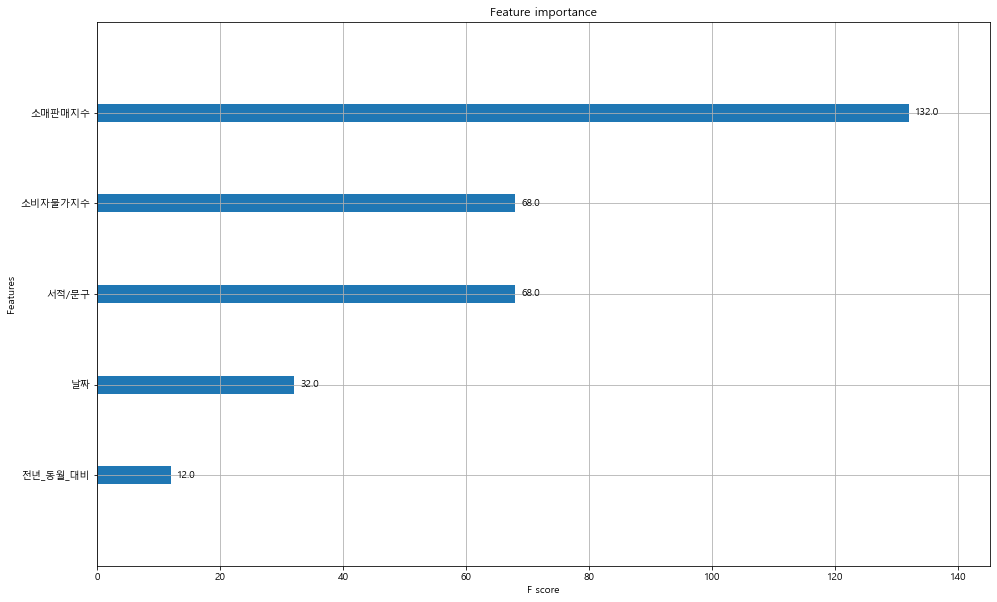

In [129]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(16,10))
plot_importance(xgb_clf, ax=ax)

In [22]:
from sklearn.tree import export_graphviz
from sklearn import tree

feature_names = ["날짜", "등락률", "소비자물가지수", "소매판매지수",  "전년_동월_대비"]
target_names = ["0", "1"]

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))
export_graphviz(dt_clf, 
                out_file="tree_corona.dot",
                class_names=target_names, 
                feature_names=feature_names, 
                impurity=True, 
                filled=True, 
                rounded=True
                )

<Figure size 1152x720 with 0 Axes>

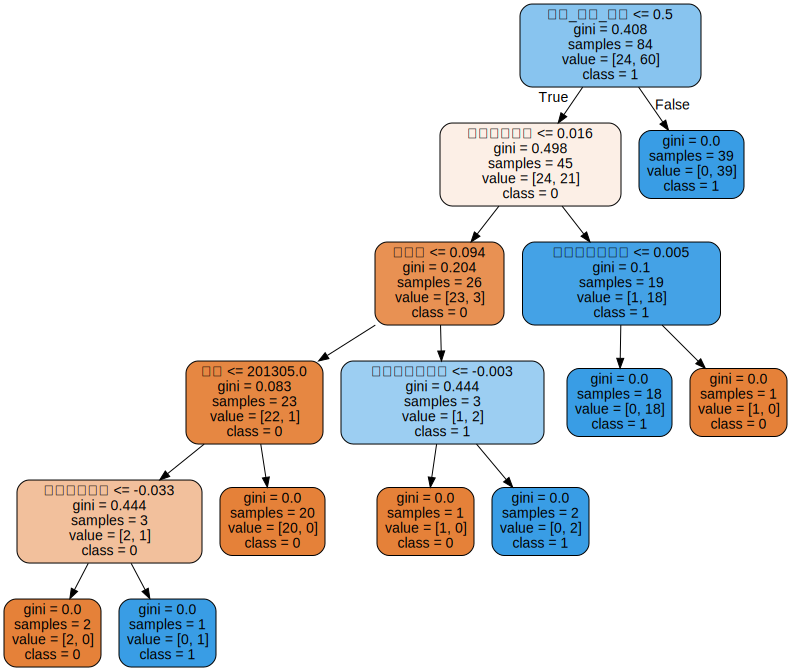

In [23]:
import graphviz

with open('./data/tree_corona.dot', encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<AxesSubplot:title={'center':'피처중요도'}>

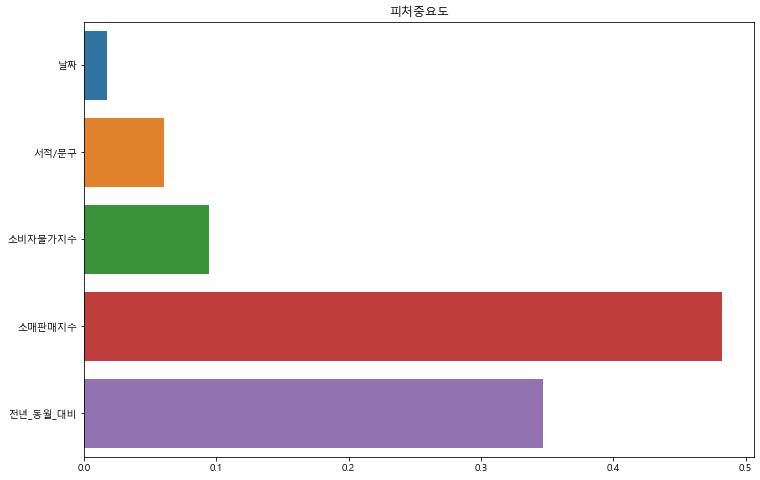

In [26]:
# 피처 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(12,8))
plt.title("피처중요도")
sns.barplot(x=dt_clf.feature_importances_, y=data.columns)